# Introduction to text analysis II

** utilities for text analysis **

Getting the punctuation list

In [6]:
import string

punctuation = string.punctuation

print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


** toward tokenization **

A *token* is a basic unity of a sentence or of a text. Usually it coincides with a word.

** split a string **

In [4]:
a = "this is a string "
tokens = a.split() ## split !
print(tokens)

['this', 'is', 'a', 'string']


** split() ** is the most useful function for a data scientist ! (no jokes !))

In [5]:
a = "this@is a string@ with a non common delimiter@@"
tokens_with_delimiter = a.split("@")
print(tokens_with_delimiter)

['this', 'is a string', ' with a non common delimiter', '', '']


### File formats for datascience ###

** Json file format **

** CSV: comma separated value **

It is the simplest way (yet powerful) to organize data in columns similarly to a spreadsheet. Can be managed with spreadsheet softwares: libreoffice, excel.

* The character that divides the fields is called "separator" or "delimiter"
* The character that encloses the text is the "quoting char"
* The column name is indicated as "header"

CSV must not have any graphical element, any line, any border !



** XML format file **

### managing json, csv and xml ###

In [15]:
import json

js = """
{"menu": {
  "id": "file",
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
"""



file
New
Open
Close


** transform a json string into a dictionary **

In [ ]:

load = json.loads(js) ## load string

## accessing internal properties: 

print(load['menu']['id'])

## iterating among internal nested properties
for menuitem in load['menu']['popup']['menuitem']:
    print(menuitem['value'])

** transform a dictionary into a json string **

In [18]:
dic = {'a' : {'b' : [1,2,3]}, 'c' : 1}
json_string = json.dumps(dic)

## please notice the different encoding "double quoting"
print(json_string)

{"a": {"b": [1, 2, 3]}, "c": 1}


** bonus: why json is so important ? **

In [29]:
import requests ##  a library to go to the web
import pprint

url = "http://api.worldbank.org/v2/datacatalog?format=json"

req = requests.get(url)

js = json.loads(req.text)

## small trick using pretty print
pprint.pprint(js)



{'datacatalog': [{'id': '1',
                  'metatype': [{'id': 'name',
                                'value': 'World Development Indicators'},
                               {'id': 'acronym', 'value': 'WDI'},
                               {'id': 'description',
                                'value': 'The primary World Bank collection of '
                                         'development indicators, compiled '
                                         'from officially-recognized '
                                         'international sources. It presents '
                                         'the most current and accurate global '
                                         'development data available, and '
                                         'includes national, regional and '
                                         'global estimates.'},
                               {'id': 'url',
                                'value': 'http://databank.worldbank.org/data/views/

### reading csv with pandas ###

An easy way to manage csv

In [33]:
import requests
import pandas as pd

csvdown = "https://datahub.io/core/global-temp/r/monthly.csv"

req = requests.get(csvdown)

# save the file:

csvout = "monthly.csv"
out = open(csvout,"w")
out.write(req.text)
out.close()


c = pd.read_csv(csvout)

In [36]:
c.head(20)

,Source,Date,Mean
0,GCAG,2016-12-08,0.7895
1,GISTEMP,2016-12-08,0.8100
2,GCAG,2016-11-08,0.7504
3,GISTEMP,2016-11-08,0.9300
4,GCAG,2016-10-08,0.7292
5,GISTEMP,2016-10-08,0.8900
6,GCAG,2016-09-08,0.8767
7,GISTEMP,2016-09-08,0.8700
8,GCAG,2016-08-08,0.8998
9,GISTEMP,2016-08-08,0.9800


In [44]:
c[c['Source'] == 'GCAG'].sort_values(by = 'Mean',ascending = False).head()

,Source,Date,Mean
18,GCAG,2016-03-08,1.2245
20,GCAG,2016-02-08,1.1921
24,GCAG,2015-12-08,1.1219
16,GCAG,2016-04-08,1.0733
22,GCAG,2016-01-08,1.0569


Populating the interactive namespace from numpy and matplotlib


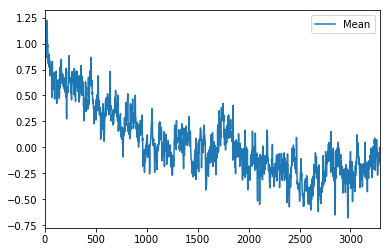

In [49]:
%pylab inline
df = c[c['Source'] == 'GCAG']
df.plot()

### working csv with csv module and dictreader ###

DictReader from the module csv is able to understand the name of the columns (if available) and to map the columns to the name

In [50]:
import csv

In [52]:
with open('monthly.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Source'], row['Date'], row['Mean'])
        print(type(row['Mean'])) ## ! it is a string not a float !

GCAG 2016-12-08 0.7895
<class 'str'>
GISTEMP 2016-12-08 0.81
<class 'str'>
GCAG 2016-11-08 0.7504
<class 'str'>
GISTEMP 2016-11-08 0.93
<class 'str'>
GCAG 2016-10-08 0.7292
<class 'str'>
GISTEMP 2016-10-08 0.89
<class 'str'>
GCAG 2016-09-08 0.8767
<class 'str'>
GISTEMP 2016-09-08 0.87
<class 'str'>
GCAG 2016-08-08 0.8998
<class 'str'>
GISTEMP 2016-08-08 0.98
<class 'str'>
GCAG 2016-07-08 0.8687
<class 'str'>
GISTEMP 2016-07-08 0.83
<class 'str'>
GCAG 2016-06-08 0.9006
<class 'str'>
GISTEMP 2016-06-08 0.76
<class 'str'>
GCAG 2016-05-08 0.8738
<class 'str'>
GISTEMP 2016-05-08 0.93
<class 'str'>
GCAG 2016-04-08 1.0733
<class 'str'>
GISTEMP 2016-04-08 1.09
<class 'str'>
GCAG 2016-03-08 1.2245
<class 'str'>
GISTEMP 2016-03-08 1.3
<class 'str'>
GCAG 2016-02-08 1.1921
<class 'str'>
GISTEMP 2016-02-08 1.35
<class 'str'>
GCAG 2016-01-08 1.0569
<class 'str'>
GISTEMP 2016-01-08 1.17
<class 'str'>
GCAG 2015-12-08 1.1219
<class 'str'>
GISTEMP 2015-12-08 1.11
<class 'str'>
GCAG 2015-11-08 0.9655
<cl

GCAG 1993-02-08 0.3967
<class 'str'>
GISTEMP 1993-02-08 0.39
<class 'str'>
GCAG 1993-01-08 0.3840
<class 'str'>
GISTEMP 1993-01-08 0.37
<class 'str'>
GCAG 1992-12-08 0.2833
<class 'str'>
GISTEMP 1992-12-08 0.22
<class 'str'>
GCAG 1992-11-08 0.0943
<class 'str'>
GISTEMP 1992-11-08 0.04
<class 'str'>
GCAG 1992-10-08 0.1154
<class 'str'>
GISTEMP 1992-10-08 0.11
<class 'str'>
GCAG 1992-09-08 0.0588
<class 'str'>
GISTEMP 1992-09-08 0.01
<class 'str'>
GCAG 1992-08-08 0.1405
<class 'str'>
GISTEMP 1992-08-08 0.1
<class 'str'>
GCAG 1992-07-08 0.1359
<class 'str'>
GISTEMP 1992-07-08 0.13
<class 'str'>
GCAG 1992-06-08 0.2821
<class 'str'>
GISTEMP 1992-06-08 0.24
<class 'str'>
GCAG 1992-05-08 0.3276
<class 'str'>
GISTEMP 1992-05-08 0.32
<class 'str'>
GCAG 1992-04-08 0.2936
<class 'str'>
GISTEMP 1992-04-08 0.24
<class 'str'>
GCAG 1992-03-08 0.4333
<class 'str'>
GISTEMP 1992-03-08 0.47
<class 'str'>
GCAG 1992-02-08 0.4485
<class 'str'>
GISTEMP 1992-02-08 0.42
<class 'str'>
GCAG 1992-01-08 0.4721
<cl

<class 'str'>
GCAG 1953-10-08 0.0723
<class 'str'>
GISTEMP 1953-10-08 0.05
<class 'str'>
GCAG 1953-09-08 0.0632
<class 'str'>
GISTEMP 1953-09-08 0.06
<class 'str'>
GCAG 1953-08-08 0.0812
<class 'str'>
GISTEMP 1953-08-08 0.08
<class 'str'>
GCAG 1953-07-08 0.0662
<class 'str'>
GISTEMP 1953-07-08 0.02
<class 'str'>
GCAG 1953-06-08 0.1240
<class 'str'>
GISTEMP 1953-06-08 0.08
<class 'str'>
GCAG 1953-05-08 0.1440
<class 'str'>
GISTEMP 1953-05-08 0.08
<class 'str'>
GCAG 1953-04-08 0.1873
<class 'str'>
GISTEMP 1953-04-08 0.2
<class 'str'>
GCAG 1953-03-08 0.1539
<class 'str'>
GISTEMP 1953-03-08 0.11
<class 'str'>
GCAG 1953-02-08 0.1534
<class 'str'>
GISTEMP 1953-02-08 0.16
<class 'str'>
GCAG 1953-01-08 0.1037
<class 'str'>
GISTEMP 1953-01-08 0.09
<class 'str'>
GCAG 1952-12-08 -0.0080
<class 'str'>
GISTEMP 1952-12-08 -0.02
<class 'str'>
GCAG 1952-11-08 -0.1975
<class 'str'>
GISTEMP 1952-11-08 -0.17
<class 'str'>
GCAG 1952-10-08 -0.0366
<class 'str'>
GISTEMP 1952-10-08 -0.04
<class 'str'>
GCAG 1

GCAG 1912-12-08 -0.3553
<class 'str'>
GISTEMP 1912-12-08 -0.42
<class 'str'>
GCAG 1912-11-08 -0.4122
<class 'str'>
GISTEMP 1912-11-08 -0.38
<class 'str'>
GCAG 1912-10-08 -0.5185
<class 'str'>
GISTEMP 1912-10-08 -0.55
<class 'str'>
GCAG 1912-09-08 -0.5056
<class 'str'>
GISTEMP 1912-09-08 -0.47
<class 'str'>
GCAG 1912-08-08 -0.4516
<class 'str'>
GISTEMP 1912-08-08 -0.51
<class 'str'>
GCAG 1912-07-08 -0.3140
<class 'str'>
GISTEMP 1912-07-08 -0.41
<class 'str'>
GCAG 1912-06-08 -0.2600
<class 'str'>
GISTEMP 1912-06-08 -0.26
<class 'str'>
GCAG 1912-05-08 -0.2257
<class 'str'>
GISTEMP 1912-05-08 -0.2
<class 'str'>
GCAG 1912-04-08 -0.2027
<class 'str'>
GISTEMP 1912-04-08 -0.2
<class 'str'>
GCAG 1912-03-08 -0.3123
<class 'str'>
GISTEMP 1912-03-08 -0.37
<class 'str'>
GCAG 1912-02-08 -0.1091
<class 'str'>
GISTEMP 1912-02-08 -0.13
<class 'str'>
GCAG 1912-01-08 -0.2791
<class 'str'>
GISTEMP 1912-01-08 -0.27
<class 'str'>
GCAG 1911-12-08 -0.2456
<class 'str'>
GISTEMP 1911-12-08 -0.25
<class 'str'>
G

GCAG 1880-02-08 -0.1229
<class 'str'>
GISTEMP 1880-02-08 -0.21
<class 'str'>
GCAG 1880-01-08 0.0009
<class 'str'>
GISTEMP 1880-01-08 -0.3
<class 'str'>
